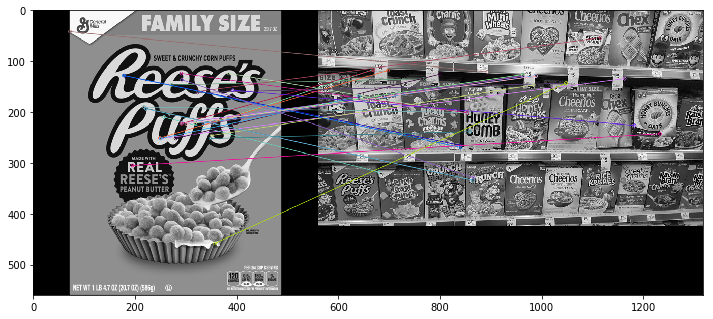

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

def display(image, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(image, cmap='gray')
    
reeses = cv2.imread('../DATA/reeses_puffs.png',0)

cereals = cv2.imread('../DATA/many_cereals.jpg',0)

#1. Brute-Force Matching with ORB Descriptors

orb = cv2.ORB_create() #creates detection object which detects and computes features

#run it on the target image and the larger secondary image 
keypoint1, descriptors1 = orb.detectAndCompute(reeses,None)
keypoint2, descriptors2 = orb.detectAndCompute(cereals,None)

#create the matching object
brute_force = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

#check where the matches occur
matches = brute_force.match(descriptors1, descriptors2)

#sort the in order of their distance (less distance == better match )
matches = sorted(matches, key=lambda x:x.distance)

reeses_matches = cv2.drawMatches(reeses, keypoint1, cereals,keypoint2,
                                matches[:30],None, flags = 2)

display(reeses_matches)

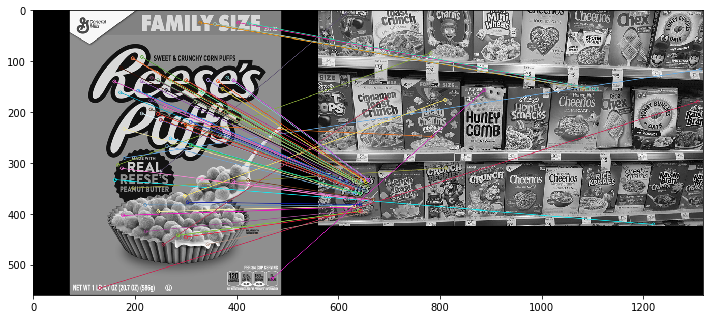

In [15]:
#2. Brute-Force Matching with SIFT Descriptors and Ratio Test
#works well images sizes that are at different scale

sift = cv2.xfeatures2d.SIFT_create()
keypoint1, descriptors1 = sift.detectAndCompute(reeses,None)
keypoint2, descriptors2 = sift.detectAndCompute(cereals,None)

brute_force = cv2.BFMatcher()
matches = brute_force.knnMatch(descriptors1,descriptors2,k=2)

#hold good matches
good_matches = []

for match1,match2 in matches:
    #if match 1 distance is les than 75% if match 2 distance
    #the desctiptor was a good match and keep it. Les distance==better match
    if match1.distance < 0.75*match2.distance:
        good_matches.append([match1])
        
sift_matches = cv2.drawMatchesKnn(reeses,keypoint1,cereals,
                                  keypoint2, good_matches, None, flags = 2)
display(sift_matches)


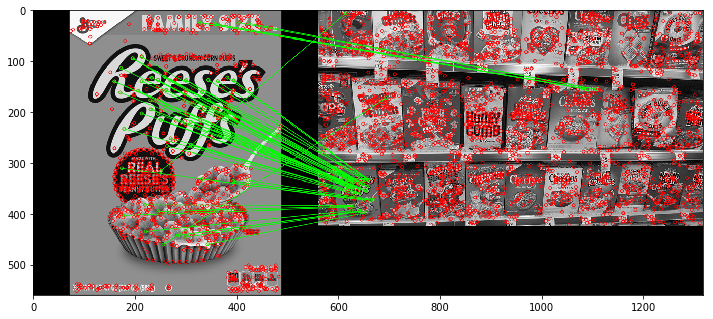

In [23]:
#3. FLANN based Matcher
sift = cv2.xfeatures2d.SIFT_create()
keypoint1, descriptors1 = sift.detectAndCompute(reeses,None)
keypoint2, descriptors2 = sift.detectAndCompute(cereals,None)

FLANN_INDEX_KDTREE = 0
index_parameters = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_parameters = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_parameters,search_parameters)
matches = flann.knnMatch(descriptors1,descriptors2,k=2)

#create a mask
matchesMask =[[0,0] for i in range(len(matches))] 

for i,(match1, match2) in enumerate (matches):
    if match1.distance < 0.7*match2.distance:
        #keep track of where we have a good match
        matchesMask[i] = [1,0]

draw_params = dict(matchColor=(0,255,0), singlePointColor=(255,0,0),
                   matchesMask=matchesMask, flags=0)

flann_matches = cv2.drawMatchesKnn(reeses, keypoint1, cereals, keypoint2,
                                  matches, None, **draw_params)
display(flann_matches)
